In [18]:
import os
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from scipy.ndimage import gaussian_filter1d
import matplotlib.ticker as ticker

In [3]:
os.getcwd()

'/Users/ramseyissa/Documents/GitHub/qNIPV/notebooks'

In [40]:
# import npy files from results folder
# results_folder = 'results'
# data = np.load('data.npy')
am_qbc_runs = np.load('../results/AM_qbc_runs.npy')
am_qnipv_runs = np.load('../results/AM_qnipv_runs.npy')
am_random_runs = np.load('../results/AM_random_runs.npy')
am_unc_runs = np.load('../results/AM_uncertainty_runs.npy')

thermo_qbc_runs = np.load('../results/thermo_qbc_runs.npy')
thermo_qnipv_runs = np.load('../results/thermo_qnipv.npy')
thermo_uncertainty = np.load('../results/thermo_uncertainty.npy')
thermo_random = np.load('../results/thermo_random.npy')

nmr_uncr_runs = np.load('../results/nmr_uncr_runs.npy')
nmr_random_runs = np.load('../results/nmr_random_runs.npy')
nmr_qnipv_runs = np.load('../results/nmr_qnipv_runs.npy')
nmr_qbc_runs = np.load('../results/nmr_qbc_runs.npy')



### percent handler

In [20]:
def xpercent(total_candidates: int, initial_percent: int, num_iterations: int):
    # Calculate initial number of samples based on the initial percent
    initial_samples = int(initial_percent / 100 * total_candidates)
    x_percentages = [initial_percent]

    # Calculate percentages for each iteration
    for i in range(1, num_iterations + 1):
        percent = initial_percent + (i / total_candidates) * 100
        x_percentages.append(percent)
    return x_percentages

In [21]:
nmr_percent = xpercent(100, 5, 100)
thermo_percent = xpercent(163, 5, 155)
am_percent = xpercent(70, 5, 67)


In [109]:
len(am_percent)

68

In [72]:
nmr_qnipv_runs.min()

0.4837945587767183

### nmr runs

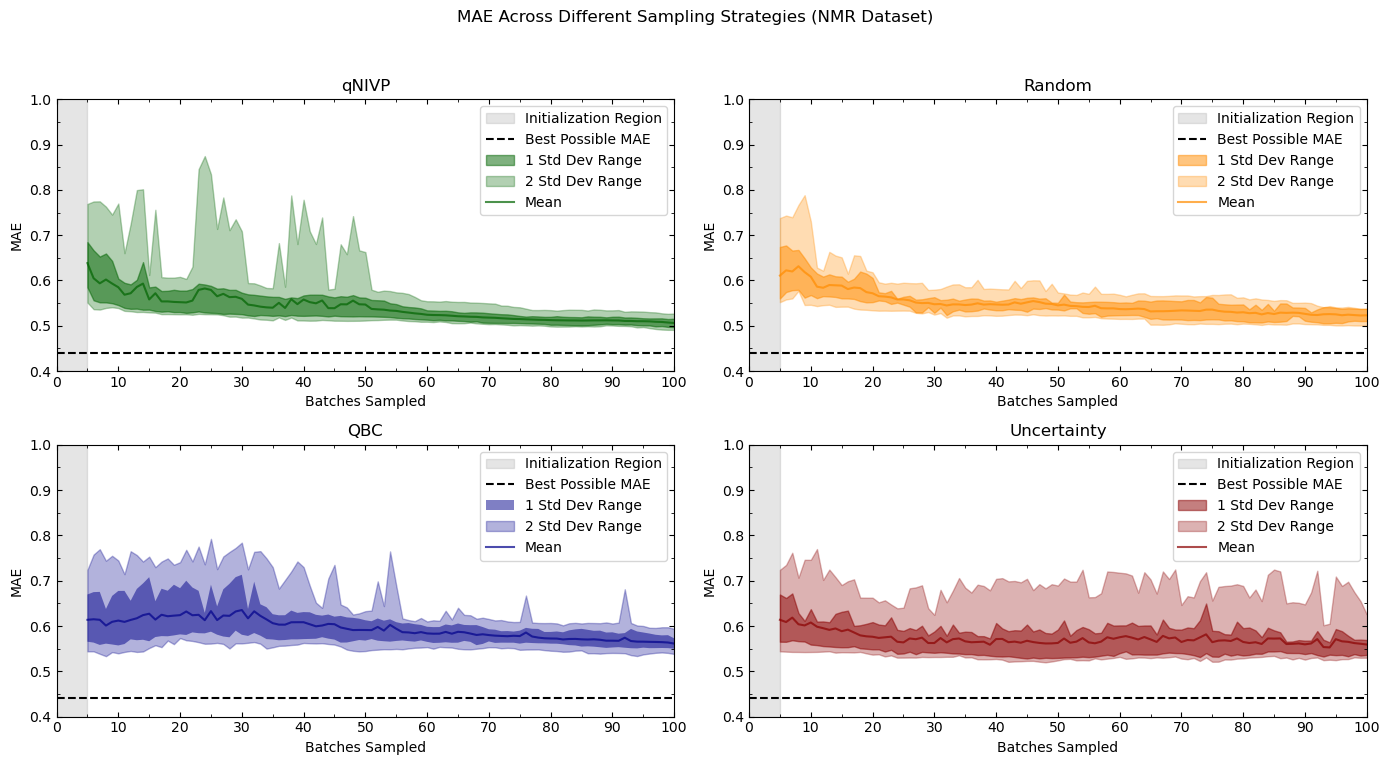

In [277]:
# Create a 2x2 grid of subplots
fig, axs = plt.subplots(2, 2, figsize=(14, 8))
fig.suptitle('MAE Across Different Sampling Strategies (NMR Dataset)')
    
for ax in axs.flat:
    ax.axvspan(0, 5, color='gray', alpha=0.2, label='Initialization Region')
    
    # ax.axvspan(50, 60, color='yellow', alpha=0.1, label='Region of Interest')
    ax.axhline(y=0.44, color='k', linestyle='--', label='Best Possible MAE')
    # ax.axhline(y=0.48, color='k', linestyle='--', label='Best MAE')
    # ax.axvline(x=5, color='r', linestyle='--', label='Initialize w/ 5%')
    ax.set_xlim([0, 100])
    ax.set_ylim([0.4, 1.0])
    ax.tick_params(axis='both', which='both', direction='in',top=True,right=True)
    ax.set_xticks(np.arange(0, 101, 10))
    ax.minorticks_on()
    ax.xaxis.set_minor_locator(ticker.AutoMinorLocator(2))
    ax.yaxis.set_minor_locator(ticker.AutoMinorLocator(2))
    ax.set_xlabel('Batches Sampled')


# First subplot: qNIVP
axs[0, 0].fill_between(nmr_percent, np.percentile(nmr_qnipv_runs,15.9,axis=0),np.percentile(nmr_qnipv_runs,84.1,axis=0) , ec='none',color='darkgreen', alpha=0.5, label='1 Std Dev Range')
# axs[0,0].axhline(y=0.48, color='k', linestyle='--', label='Best MAE')
axs[0, 0].fill_between(nmr_percent,np.percentile(nmr_qnipv_runs,2.3,axis=0),np.percentile(nmr_qnipv_runs,97.7,axis=0), ec='none',color='darkgreen', alpha=0.3, label='2 Std Dev Range')
axs[0, 0].plot(nmr_percent, np.mean(nmr_qnipv_runs,axis=0), color='darkgreen',alpha=0.7, label='Mean')
axs[0, 0].set_title('qNIVP')
# axs[0, 0].set_xlabel('Percent of Dataset')
axs[0, 0].set_ylabel('MAE')
axs[0, 0].legend()

# Second subplot: Random
axs[0, 1].fill_between(nmr_percent,np.percentile(nmr_random_runs,15.9,axis=0),np.percentile(nmr_random_runs,84.1,axis=0), ec='none',color='darkorange', alpha=0.5, label='1 Std Dev Range')
axs[0, 1].fill_between(nmr_percent, np.percentile(nmr_random_runs,2.3,axis=0),np.percentile(nmr_random_runs,97.7,axis=0), ec='none',color='darkorange', alpha=0.3, label='2 Std Dev Range')
axs[0,1].plot(nmr_percent, np.mean(nmr_random_runs,axis=0), color='darkorange',alpha=0.7, label='Mean')
axs[0, 1].set_title('Random')
axs[0, 1].set_ylabel('MAE')
axs[0, 1].legend()



axs[1, 0].fill_between(nmr_percent, np.percentile(nmr_qbc_runs, 15.9,axis=0), np.percentile(nmr_qbc_runs, 84.1,axis=0), color='darkblue', alpha=0.5, label='1 Std Dev Range',ec = 'none')
axs[1, 0].fill_between(nmr_percent, np.percentile(nmr_qbc_runs, 2.3, axis=0),np.percentile(nmr_qbc_runs,97.7,axis =0),ec = 'none', color='darkblue', alpha=0.3, label='2 Std Dev Range')
axs[1,0].plot(nmr_percent, np.mean(nmr_qbc_runs,axis=0),color='darkblue',alpha=0.7, label='Mean')
axs[1, 0].set_title('QBC')
axs[1, 0].set_ylabel('MAE')
axs[1, 0].legend()



# Fourth subplot: Uncertainty
axs[1, 1].fill_between(nmr_percent, np.percentile(nmr_uncr_runs,15.9,axis=0), np.percentile(nmr_uncr_runs,84.1,axis=0), ec='none',color='darkred', alpha=0.5, label='1 Std Dev Range')
axs[1, 1].fill_between(nmr_percent,np.percentile(nmr_uncr_runs,2.3,axis=0), np.percentile(nmr_uncr_runs,97.7,axis=0), ec='none',color='darkred', alpha=0.3, label='2 Std Dev Range')
axs[1, 1].plot(nmr_percent, np.mean(nmr_uncr_runs,axis=0), color='darkred',alpha=0.7, label='Mean')
axs[1, 1].set_title('Uncertainty')
# axs[1, 1].set_xlabel('Percent of Dataset')
axs[1, 1].set_ylabel('MAE')
axs[1, 1].legend()

# Adjust layout to avoid overlapping
plt.tight_layout(rect=[0, 0.03, 1, 0.95])  # Adjust to make room for the main title
plt.show()

### AutoAM Dataset

In [105]:
len(am_percent)

69

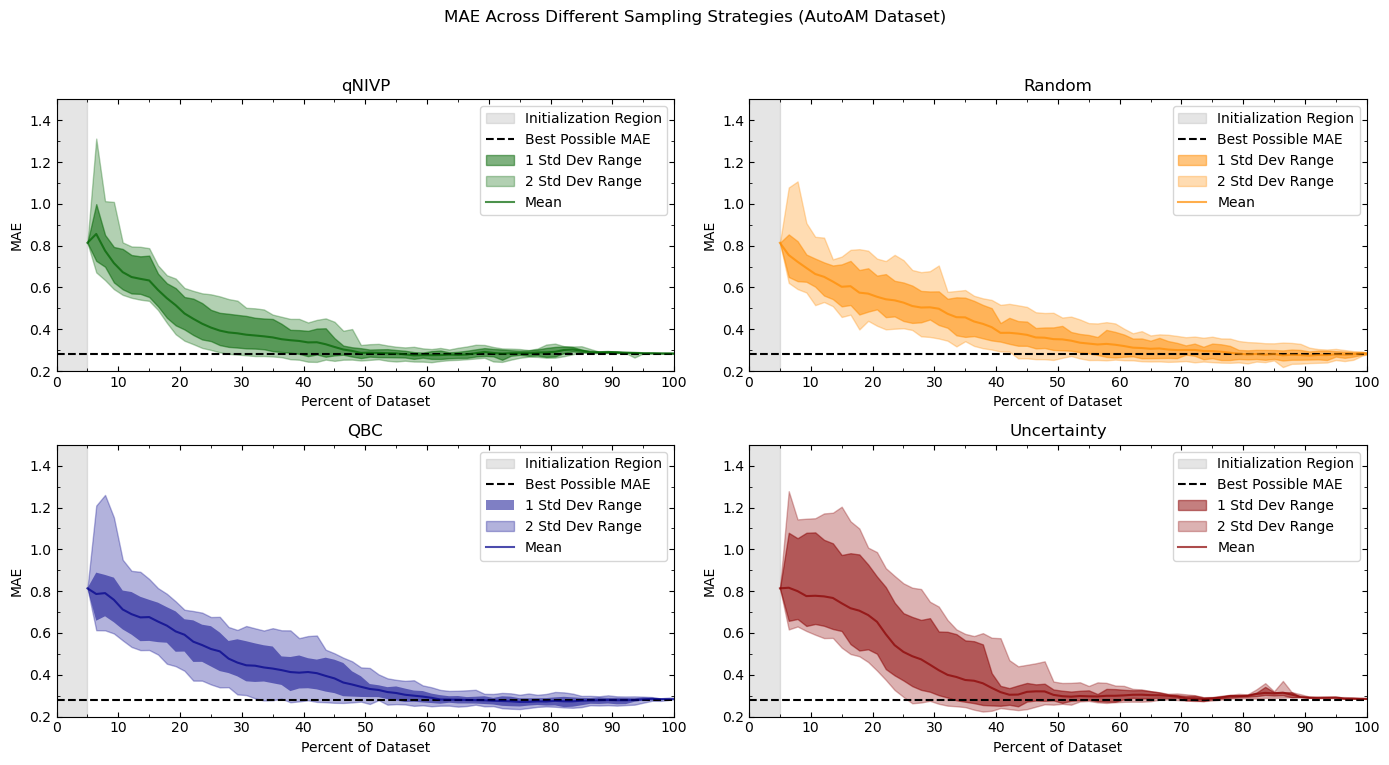

In [278]:
# Create a 2x2 grid of subplots
fig, axs = plt.subplots(2, 2, figsize=(14, 8))
fig.suptitle('MAE Across Different Sampling Strategies (AutoAM Dataset)')
    
for ax in axs.flat:
    ax.axvspan(0, 5, color='gray', alpha=0.2, label='Initialization Region')
    
    # ax.axvspan(50, 60, color='yellow', alpha=0.1, label='Region of Interest')
    ax.axhline(y=0.28, color='k', linestyle='--', label='Best Possible MAE')
    # ax.axhline(y=0.48, color='k', linestyle='--', label='Best MAE')
    # ax.axvline(x=5, color='r', linestyle='--', label='Initialize w/ 5%')
    ax.set_xlim([0, 100])
    ax.set_ylim([0.2, 1.5])
    ax.set_xticks(np.arange(0, 101, 10))
    ax.set_xlabel('Percent of Dataset')
    ax.tick_params(axis='both', which='both', direction='in',top=True,right=True)
    ax.minorticks_on()
    ax.xaxis.set_minor_locator(ticker.AutoMinorLocator(2)) 
    ax.yaxis.set_minor_locator(ticker.AutoMinorLocator(2))
        
    


#increment the xticks by 10
for ax in axs.flat:
    ax.set_xticks(np.arange(0, 101, 10))

# First subplot: qNIVP
axs[0, 0].fill_between(am_percent, np.percentile(am_qnipv_runs,15.9,axis=0),np.percentile(am_qnipv_runs,84.1,axis=0) , ec='none',color='darkgreen', alpha=0.5, label='1 Std Dev Range')
# axs[0,0].axhline(y=0.48, color='k', linestyle='--', label='Best MAE')
axs[0, 0].fill_between(am_percent,np.percentile(am_qnipv_runs,2.3,axis=0),np.percentile(am_qnipv_runs,97.7,axis=0) , ec='none',color='darkgreen', alpha=0.3, label='2 Std Dev Range')
axs[0, 0].plot(am_percent, np.mean(am_qnipv_runs,axis=0), color='darkgreen',alpha=0.7, label='Mean')
axs[0, 0].set_title('qNIVP')
# axs[0, 0].set_xlabel('Percent of Dataset')
axs[0, 0].set_ylabel('MAE')
axs[0, 0].legend()

# Second subplot: Random
axs[0, 1].fill_between(am_percent,np.percentile(am_random_runs,15.9,axis=0),np.percentile(am_random_runs,84.1,axis=0), ec='none',color='darkorange', alpha=0.5, label='1 Std Dev Range')
axs[0, 1].fill_between(am_percent, np.percentile(am_random_runs,2.3,axis=0),np.percentile(am_random_runs,97.7,axis=0), ec='none',color='darkorange', alpha=0.3, label='2 Std Dev Range')
axs[0,1].plot(am_percent, np.mean(am_random_runs,axis=0), color='darkorange',alpha=0.7, label='Mean')
axs[0, 1].set_title('Random')
axs[0, 1].set_ylabel('MAE')
axs[0, 1].legend()


# Third subplot: QBC
axs[1, 0].fill_between(am_percent, np.percentile(am_qbc_runs, 15.9,axis=0), np.percentile(am_qbc_runs, 84.1,axis=0), color='darkblue', alpha=0.5, label='1 Std Dev Range',ec = 'none')
axs[1, 0].fill_between(am_percent, np.percentile(am_qbc_runs, 2.3, axis=0),np.percentile(am_qbc_runs,97.7,axis =0),ec = 'none', color='darkblue', alpha=0.3, label='2 Std Dev Range')
axs[1,0].plot(am_percent, np.mean(am_qbc_runs,axis=0),color='darkblue',alpha=0.7, label='Mean')
axs[1, 0].set_title('QBC')
axs[1, 0].set_ylabel('MAE')
axs[1, 0].legend()



# Fourth subplot: Uncertainty
axs[1, 1].fill_between(am_percent, np.percentile(am_unc_runs,15.9,axis=0), np.percentile(am_unc_runs,84.1,axis=0), ec='none',color='darkred', alpha=0.5, label='1 Std Dev Range')
axs[1, 1].fill_between(am_percent,np.percentile(am_unc_runs,2.3,axis=0), np.percentile(am_unc_runs,97.7,axis=0), ec='none',color='darkred', alpha=0.3, label='2 Std Dev Range')
axs[1, 1].plot(am_percent, np.mean(am_unc_runs,axis=0), color='darkred',alpha=0.7, label='Mean')
axs[1, 1].set_title('Uncertainty')
# axs[1, 1].set_xlabel('Percent of Dataset')
axs[1, 1].set_ylabel('MAE')
axs[1, 1].legend()

# Adjust layout to avoid overlapping
plt.tight_layout(rect=[0, 0.03, 1, 0.95])  # Adjust to make room for the main title
plt.show()

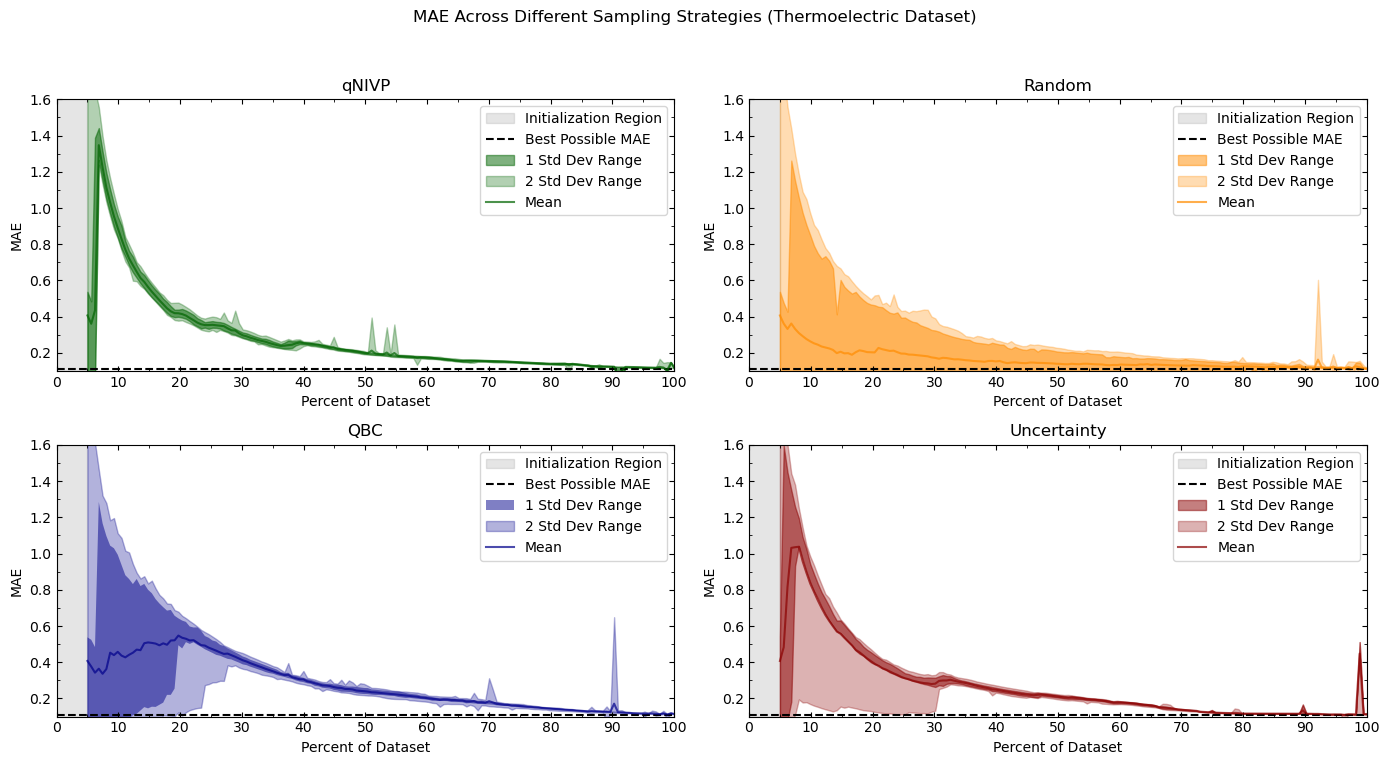

In [279]:
# Create a 2x2 grid of subplots
fig, axs = plt.subplots(2, 2, figsize=(14, 8))
fig.suptitle('MAE Across Different Sampling Strategies (Thermoelectric Dataset)')
    
for ax in axs.flat:
    ax.axvspan(0, 5, color='gray', alpha=0.2, label='Initialization Region')
    
    # ax.axvspan(50, 60, color='yellow', alpha=0.1, label='Region of Interest')
    ax.axhline(y=0.11, color='k', linestyle='--', label='Best Possible MAE')
    # ax.axhline(y=0.48, color='k', linestyle='--', label='Best MAE')
    # ax.axvline(x=5, color='r', linestyle='--', label='Initialize w/ 5%')
    ax.set_xlim([0, 100])
    ax.set_ylim([0.1, 1.6])
    ax.set_xticks(np.arange(0, 101, 10))
    ax.set_xlabel('Percent of Dataset')
    
    ax.tick_params(axis='both', which='both', direction='in',top=True,right=True)
    ax.minorticks_on()
    ax.xaxis.set_minor_locator(ticker.AutoMinorLocator(2)) 
    ax.yaxis.set_minor_locator(ticker.AutoMinorLocator(2))
    
    


#increment the xticks by 10
for ax in axs.flat:
    ax.set_xticks(np.arange(0, 101, 10))

# First subplot: qNIVP
axs[0, 0].fill_between(thermo_percent, np.percentile(thermo_qnipv_runs,15.9,axis=0),np.percentile(thermo_qnipv_runs,84.1,axis=0) , ec='none',color='darkgreen', alpha=0.5, label='1 Std Dev Range')
# axs[0,0].axhline(y=0.48, color='k', linestyle='--', label='Best MAE')
axs[0, 0].fill_between(thermo_percent,np.percentile(thermo_qnipv_runs,2.3,axis=0),np.percentile(thermo_qnipv_runs,97.7,axis=0) , ec='none',color='darkgreen', alpha=0.3, label='2 Std Dev Range')
axs[0, 0].plot(thermo_percent, np.mean(thermo_qnipv_runs,axis=0), color='darkgreen',alpha=0.7, label='Mean')
axs[0, 0].set_title('qNIVP')
# axs[0, 0].set_xlabel('Percent of Dataset')
axs[0, 0].set_ylabel('MAE')
axs[0, 0].legend()

# Second subplot: Random
axs[0, 1].fill_between(thermo_percent,np.percentile(thermo_random,15.9,axis=0),np.percentile(thermo_random,84.1,axis=0), ec='none',color='darkorange', alpha=0.5, label='1 Std Dev Range')
axs[0, 1].fill_between(thermo_percent, np.percentile(thermo_random,2.3,axis=0),np.percentile(thermo_random,97.7,axis=0), ec='none',color='darkorange', alpha=0.3, label='2 Std Dev Range')
axs[0,1].plot(thermo_percent, np.mean(thermo_random,axis=0), color='darkorange',alpha=0.7, label='Mean')
axs[0, 1].set_title('Random')
axs[0, 1].set_ylabel('MAE')
axs[0, 1].legend()


# Third subplot: QBC
axs[1, 0].fill_between(thermo_percent, np.percentile(thermo_qbc_runs, 15.9,axis=0), np.percentile(thermo_qbc_runs, 84.1,axis=0), color='darkblue', alpha=0.5, label='1 Std Dev Range',ec = 'none')
axs[1, 0].fill_between(thermo_percent, np.percentile(thermo_qbc_runs, 2.3, axis=0),np.percentile(thermo_qbc_runs,97.7,axis =0),ec = 'none', color='darkblue', alpha=0.3, label='2 Std Dev Range')
axs[1,0].plot(thermo_percent, np.mean(thermo_qbc_runs,axis=0),color='darkblue',alpha=0.7, label='Mean')
axs[1, 0].set_title('QBC')
axs[1, 0].set_ylabel('MAE')
axs[1, 0].legend()



# Fourth subplot: Uncertainty
axs[1, 1].fill_between(thermo_percent, np.percentile(thermo_uncertainty,15.9,axis=0), np.percentile(thermo_uncertainty,84.1,axis=0), ec='none',color='darkred', alpha=0.5, label='1 Std Dev Range')
axs[1, 1].fill_between(thermo_percent,np.percentile(thermo_uncertainty,2.3,axis=0), np.percentile(thermo_uncertainty,97.7,axis=0), ec='none',color='darkred', alpha=0.3, label='2 Std Dev Range')
axs[1, 1].plot(thermo_percent, np.mean(thermo_uncertainty,axis=0), color='darkred',alpha=0.7, label='Mean')
axs[1, 1].set_title('Uncertainty')
# axs[1, 1].set_xlabel('Percent of Dataset')
axs[1, 1].set_ylabel('MAE')
axs[1, 1].legend()

# Adjust layout to avoid overlapping
plt.tight_layout(rect=[0, 0.03, 1, 0.95])  # Adjust to make room for the main title
plt.show()

In [118]:
logei_am = np.load('../results/logei_autoAM_qnipv_vs_logei_30percent.npy')
qnipv_am = np.load('../results/qnipv_autoAM_qnipv_vs_logei_30percent.npy')

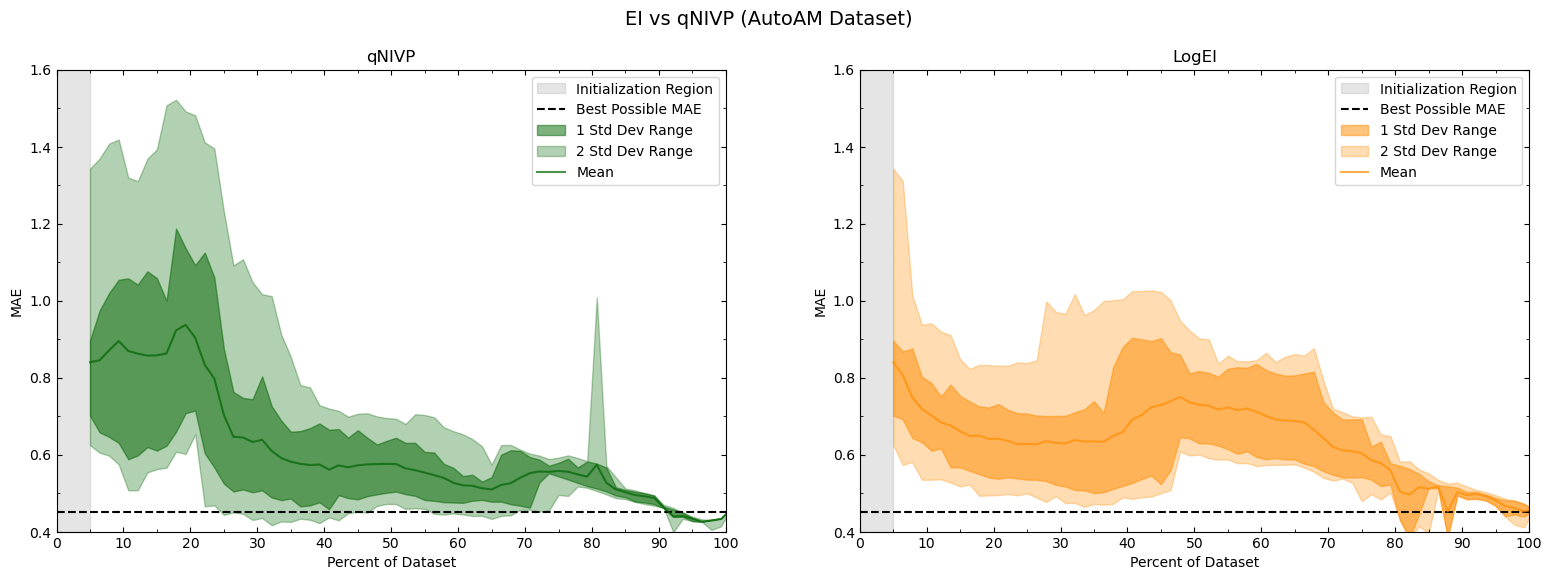

In [274]:
# Create a 2x2 grid of subplots
fig, axs = plt.subplots(1, 2, figsize=(19, 6))
fig.suptitle('EI vs qNIVP (AutoAM Dataset)', size=14)

# Plot a horizontal line at y=0.28 for all subplots
# for ax in axs.flat:
#     ax.axhline(y=0.51, color='k', linestyle='--', label='Best MAE')
    
for ax in axs.flat:
    # Highlight initialization region (0-5%)
    ax.axvspan(0, 5, color='gray', alpha=0.2,label='Initialization Region')
    # label='Initialization Region'
    # You can add more regions if needed:
    # ax.axvspan(50, 60, color='yellow', alpha=0.1, label='Region of Interest')
    
    ax.axhline(y=0.45, color='k', linestyle='--', label='Best Possible MAE')
    # label='Initialize w/ 5%'
    ax.set_xlim([0, 100])
    ax.set_ylim([0.4, 1.6])
    ax.set_xticks(np.arange(0, 101, 10))
    
    ax.tick_params(axis='both', which='both', direction='in',top=True,right=True)
    ax.minorticks_on()
    ax.xaxis.set_minor_locator(ticker.AutoMinorLocator(2)) 
    ax.yaxis.set_minor_locator(ticker.AutoMinorLocator(2))
    


# First subplot: qNIVP
axs[0].fill_between(am_percent, np.percentile(qnipv_am,15.9,axis=0),np.percentile(qnipv_am,84.1,axis=0) , ec='none',color='darkgreen', alpha=0.5, label='1 Std Dev Range')
axs[0].fill_between(am_percent,np.percentile(qnipv_am,2.3,axis=0),np.percentile(qnipv_am,97.7,axis=0) , ec='none',color='darkgreen', alpha=0.3, label='2 Std Dev Range')
axs[0].plot(am_percent, np.mean(qnipv_am,axis=0), color='darkgreen',alpha=0.7, label='Mean')
axs[0].set_title('qNIVP')
axs[0].set_xlabel('Percent of Dataset')
axs[0].set_ylabel('MAE')
axs[0].legend()

# Second subplot: EI
axs[1].fill_between(am_percent,np.percentile(logei_am,15.9,axis=0),np.percentile(logei_am,84.1,axis=0), ec='none',color='darkorange', alpha=0.5, label='1 Std Dev Range')
axs[1].fill_between(am_percent, np.percentile(logei_am,2.3,axis=0),np.percentile(logei_am,97.7,axis=0), ec='none',color='darkorange', alpha=0.3, label='2 Std Dev Range')
axs[1].plot(am_percent, np.mean(logei_am,axis=0), color='darkorange',alpha=0.7, label='Mean')
axs[1].set_title('LogEI')
axs[1].set_xlabel('Percent of Dataset')
axs[1].set_ylabel('MAE')
axs[1].legend()

### rate of change of MAE

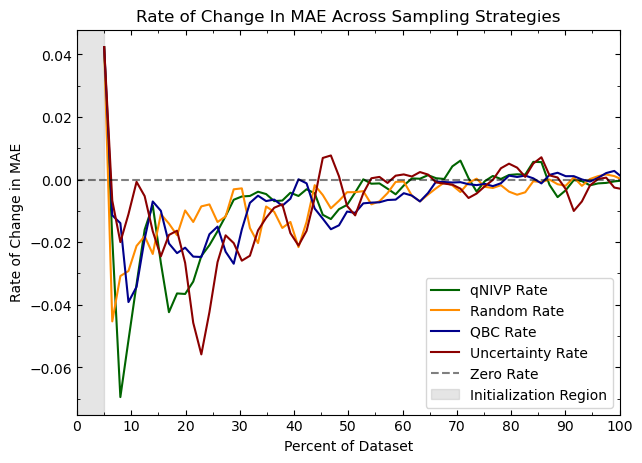

In [ ]:
# Compute gradients for each strategy
# nipv_rate = np.gradient(gaussian_filter1d(np.mean(am_qnipv_runs, axis=0), sigma=2), am_percent)
# random_rate = np.gradient(gaussian_filter1d(np.mean(am_random_runs, axis=0), sigma=2), am_percent)
# qbc_rate = np.gradient(gaussian_filter1d(np.mean(am_qbc_runs, axis=0), sigma=2), am_percent)
# uncertainty_rate = np.gradient(gaussian_filter1d(np.mean(am_unc_runs, axis=0),
# sigma=2), am_percent)

nipv_rate = np.gradient(np.mean(am_qnipv_runs,axis=0))
random_rate = np.gradient(np.mean(am_random_runs,axis=0))
qbc_rate = np.gradient(np.mean(am_qbc_runs,axis=0))
uncertainty_rate = np.gradient(np.mean(am_unc_runs,axis=0))


am_percent = np.linspace(0, 100, len(np.mean(am_qnipv_runs, axis=0)))

reference_value = nipv_rate[0]

random_offset = reference_value - random_rate[0]
qbc_offset = reference_value - qbc_rate[0]
uncertainty_offset = reference_value - uncertainty_rate[0]

# Apply the offsets only to the first point
random_rate[0] += random_offset
qbc_rate[0] += qbc_offset
uncertainty_rate[0] += uncertainty_offset

# Plot the adjusted gradients
fig, ax = plt.subplots(figsize=(7, 5))
ax.plot(am_percent + 5 , nipv_rate, label="qNIVP Rate", color="darkgreen")
ax.plot(am_percent + 5, random_rate, label="Random Rate", color="darkorange")
ax.plot(am_percent + 5, qbc_rate, label="QBC Rate", color="darkblue")
ax.plot(am_percent + 5, uncertainty_rate, label="Uncertainty Rate", color="darkred")

# Highlight specific points (optional)
ax.axhline(0, color='k', linestyle='--', alpha=0.5, label="Zero Rate")
ax.axvspan(0, 5, color='gray', alpha=0.2, label='Initialization Region')
ax.set_xticks(np.arange(0, 101, 10))
ax.minorticks_on()
ax.xaxis.set_minor_locator(ticker.AutoMinorLocator(2))
ax.yaxis.set_minor_locator(ticker.AutoMinorLocator(2))
ax.tick_params(which='both', axis='both', direction='in', top=True, right=True)

# Add labels, legend, and title
ax.set_xlabel("Percent of Dataset")
ax.set_ylabel("Rate of Change in MAE")
ax.set_title("Rate of Change In MAE Across Sampling Strategies")
ax.set_xlim([0, 100])
ax.legend()

plt.show()



### Plot of time for NMR dataset

In [175]:
timing_uncr_nmr = np.load('timing_uncertainty_nmr.npy').reshape(-1)
timing_qnipv_nmr = np.load('timing_qnipv_nmr.npy').reshape(-1)
timing_random_nmr = np.load('timing_random_nmr.npy').reshape(-1)
timing_qbc_nmr = np.load('timing_qbc_nmr.npy').reshape(-1)

In [180]:
iterations = np.linspace(0, 100, 100)
iterations.shape

(100,)

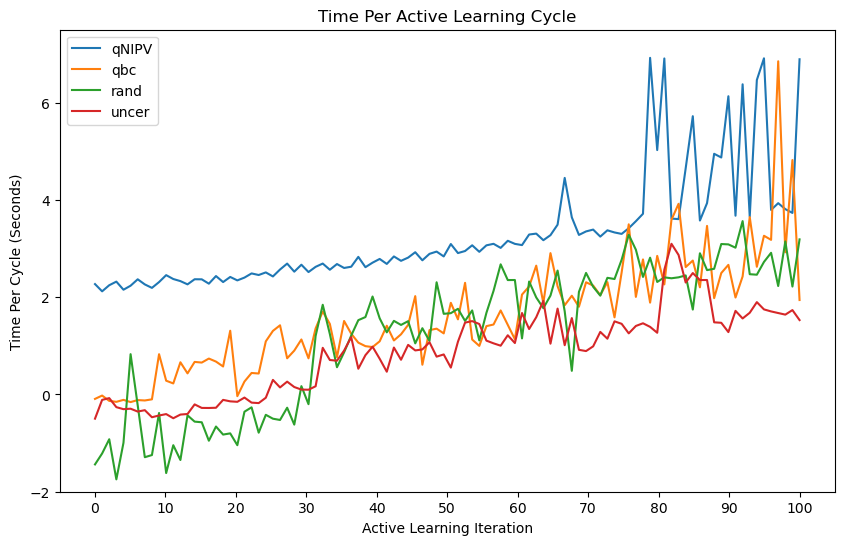

In [ ]:
fig, ax = plt.subplots(figsize=(10, 6))

# plt.figure(figsize=(10, 6))
ax.plot(iterations, np.log(timing_qnipv_nmr), label="qNIPV")
ax.plot(iterations, np.log(timing_qbc_nmr), label="qbc")
ax.plot(iterations, np.log(timing_random_nmr), label="darkorange")
ax.plot(iterations, np.log(timing_uncr_nmr), label="uncer")
ax.set_ylim([-2, 7.5])
ax.set_xticks(np.arange(0, 101, 10))
ax.set_xticks(np.arange(0, 101, 10))
ax.set_xlabel("Active Learning Iteration")
ax.set_ylabel("Time Per Cycle (Seconds)")
ax.set_title("Time Per Active Learning Cycle")
ax.legend()
# plt.grid(True)
plt.show()


### gaussian filter to smooth time curves

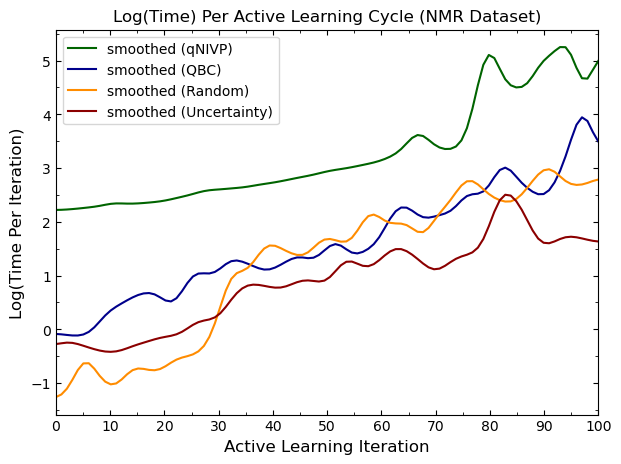

In [284]:
import matplotlib.ticker as ticker
# Gaussian smoothing
smoothed_qnipv = gaussian_filter1d(np.log(timing_qnipv_nmr), sigma=2)
smoothed_qbc = gaussian_filter1d(np.log(timing_qbc_nmr), sigma=2)
smoothed_rand = gaussian_filter1d(np.log(timing_random_nmr), sigma=2)
smoothed_uncer = gaussian_filter1d(np.log(timing_uncr_nmr), sigma=2)

fig,ax, = plt.subplots(figsize=(7, 5))
ax.plot(iterations, smoothed_qnipv, label="smoothed (qNIVP)", color="darkgreen")
ax.plot(iterations, smoothed_qbc, label="smoothed (QBC)", color="darkblue")
ax.plot(iterations, smoothed_rand, label="smoothed (Random)", color="darkorange")
ax.plot(iterations, smoothed_uncer, label="smoothed (Uncertainty)", color="darkred")
# ax.plot(iterations, np.log(timing_qnipv_nmr), label="qNIVP", color="darkgreen")
# ax.plot(iterations, np.log(timing_qbc_nmr), label="QBC", color="darkblue")
# ax.plot(iterations, np.log(timing_random_nmr), label="Random", color="darkorange")
# ax.plot(iterations, np.log(timing_uncr_nmr), label="Uncertainty", color="darkred")
ax.set_xlabel("Active Learning Iteration",size=12)
ax.set_ylabel("Log(Time Per Iteration)",size=12)
ax.set_xlim([0, 100])
ax.tick_params(axis='both', which='both', direction='in',top=True,right=True)
ax.set_xticks(np.arange(0, 101, 10))
ax.minorticks_on()
ax.xaxis.set_minor_locator(ticker.AutoMinorLocator(2))  # Minor ticks every half step
ax.yaxis.set_minor_locator(ticker.AutoMinorLocator(2))
ax.set_title("Log(Time) Per Active Learning Cycle (NMR Dataset)",size=12)

ax.legend()
plt.show()


/var/folders/qf/pmcgmztj4v91fy0j9fq_m9kc0000gn/T/ipykernel_36003/4274742106.py:26: MatplotlibDeprecationWarning: Passing the emit parameter of set_xlim() positionally is deprecated since Matplotlib 3.6; the parameter will become keyword-only two minor releases later.
  plt.xlim(0,100,10)


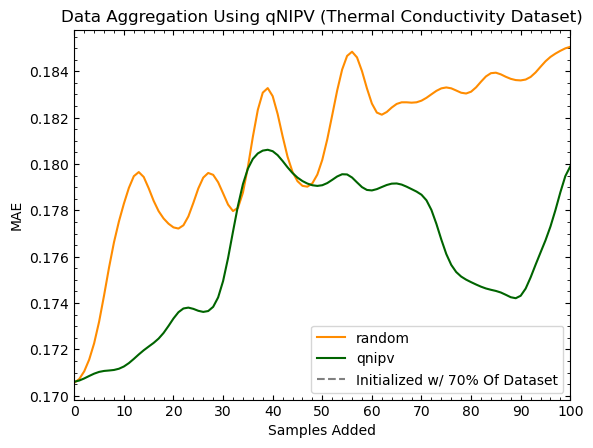

In [12]:
random_mae_np = np.load('data_agg_random_thermo_dataset.npy')
qnipv_dataagg = np.load('dataagg_thermo_qnipv.npy')
qnipv_np = qnipv_dataagg.reshape(-1)
qnipv_np

import matplotlib.ticker as ticker
from scipy.ndimage import gaussian_filter1d
fig, ax = plt.subplots()

ax.xaxis.set_major_locator(ticker.MultipleLocator(1))
ax.xaxis.set_minor_locator(ticker.MultipleLocator(1))

# ax.yaxis.set_major_locator(ticker.MultipleLocator(5))
# ax.yaxis.set_minor_locator(ticker.MultipleLocator(1))
plt.plot(np.linspace(0,100,101), gaussian_filter1d(random_mae_np,sigma=2), label='random', color='darkorange')
plt.plot(np.linspace(0,100,101), gaussian_filter1d(qnipv_np,sigma=2), label='qnipv', color='darkgreen')
plt.axvline(0, color='gray', linestyle='--', label='Initialized w/ 70% Of Dataset')
plt.tick_params(axis='both', which='both', direction='in',top=True,right=True)
plt.minorticks_on()
#set minor ticks for both axis
# plt.xticks(np.arange(0, 101, 10))
# plt.yticks(np.arange(0.1, 1.6, 0.1))
plt.minorticks_on()
# plt.xaxis.set_minor_locator(ticker.AutoMinorLocator(2))  # Minor ticks every half step
# plt.yaxis.set_minor_locator(ticker.AutoMinorLocator(2))
plt.xlim(0,100,10)
plt.xticks(np.arange(0, 101, 10))
plt.xlabel('Samples Added')
plt.ylabel('MAE')
plt.title('Data Aggregation Using qNIPV (Thermal Conductivity Dataset)')
plt.legend()